# Input and Output Structures

**Any model is a data processing pipeline.**

## Input Data Types (Single or Multiple Modalities)
- Row of a table
- Image
- Document
- Sequence of rows (time series data)
- Sequence of images (video)
- Sequence of audio signals

## Output Types

### Predictive AI
1. Multi-Class Classification
2. Multi-variate Regression
3. Time Series Analysis

**Time series is better done in xgboost. Rest are done better with neural networks.**

### Generative AI
- Image generation
- Text generation
- Video generation
- Audio generation

# Neural Network Structure

## Basic Components

1. Neurons
   - Perform linear combination of inputs
   - Apply nonlinear activation function
   - Contain parameters: weights and biases

2. Layers
   - Composed of multiple neurons
   - Different types for various tasks

3. Network
   - Composed of multiple layers

## Layer Hierarchy
1. Input Layer: Contains the input data
2. Hidden Layers: Process information
3. Output Layer: Produces final result (task-dependent)

## Important Layer Types
- Dense
- Convolution
- Multi-Head Attention (MHA)
- Masked Multi-Head Attention

### Definition
A neuron is a computational or data processing unit in a neural network.

### Key Activities
1. Linear Combination
   - Takes inputs
   - Applies weights to inputs
   - Sums the weighted inputs
   - Adds a bias term

2. Activation
   - Applies a nonlinear activation function to the result of the linear combination

### Mathematical Representation
Given inputs $x_1, x_2, \ldots, x_n$:

1. Linear combination: $z = w_1x_1 + w_2x_2 + \ldots + w_nx_n + b$ where $w_i$ are weights and $b$ is the bias

2. Activation: $y = \sigma(z)$ where $\sigma$ is the activation function and $y$ is the neuron's output

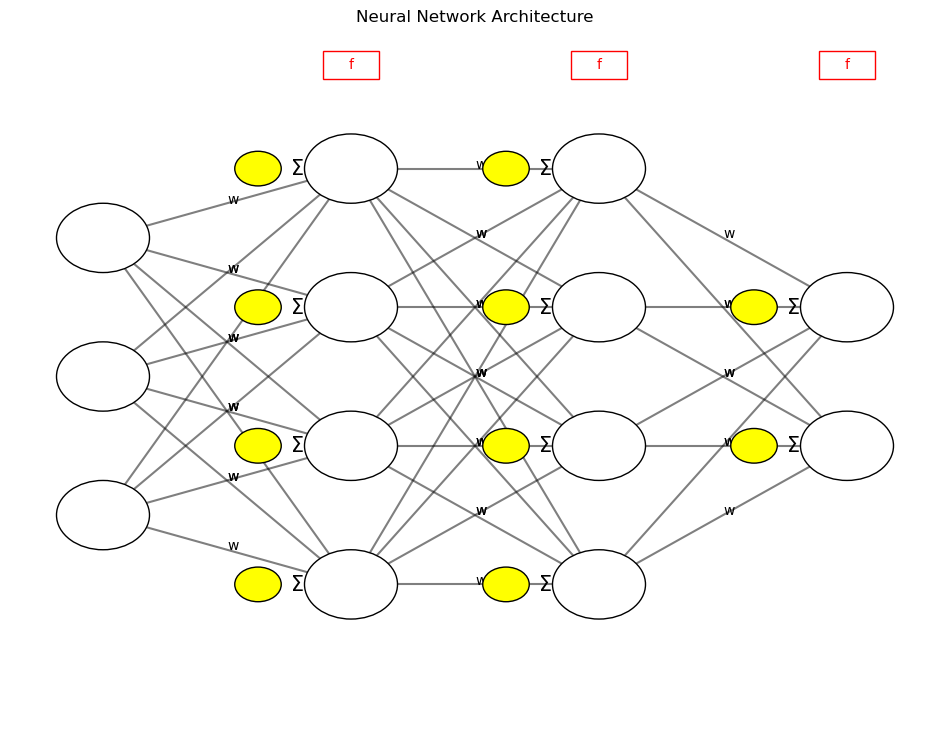

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_network(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            if n == 0:
                plt.annotate('Input', xy=(left-0.2, layer_top - m*v_spacing))
            elif n == len(layer_sizes)-1:
                plt.annotate('Output', xy=(right+0.2, layer_top - m*v_spacing))
    
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k', alpha=0.5)
                ax.add_artist(line)
    
    # Weights
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                plt.annotate('w', xy=(n*h_spacing + left + 0.5*h_spacing, 
                                      (layer_top_a - m*v_spacing + layer_top_b - o*v_spacing)/2))

    # Biases
    for n, layer_size in enumerate(layer_sizes[1:], 1):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            bias_circle = plt.Circle((n*h_spacing + left - 0.1, layer_top - m*v_spacing), v_spacing/8.,
                                     color='yellow', ec='k', zorder=5)
            ax.add_artist(bias_circle)
            plt.annotate('b', xy=(n*h_spacing + left - 0.1, layer_top - m*v_spacing),
                         ha='center', va='center')

    # Activation functions
    for n, layer_size in enumerate(layer_sizes[1:], 1):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        activation_box = plt.Rectangle((n*h_spacing + left - 0.03, top + 0.03), 0.06, 0.04, 
                                       fill=False, ec='r', zorder=5)
        ax.add_artist(activation_box)
        plt.annotate('f', xy=(n*h_spacing + left, top + 0.05), 
                     ha='center', va='center', color='r')

    # Summation symbols
    for n, layer_size in enumerate(layer_sizes[1:], 1):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            plt.annotate('Σ', xy=(n*h_spacing + left - 0.05, layer_top - m*v_spacing),
                         ha='right', va='center', fontsize=15)

fig = plt.figure(figsize=(12, 9))
ax = fig.gca()
ax.axis('off')
draw_neural_network(ax, .1, .9, .1, .9, [3, 4, 4, 2])
plt.title('Neural Network Architecture')
plt.show()

An efficient representation of data is done by rotation which is just matrix multiplication or linear combination. Bias is added for shifting of origin for a much better representation. Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns and make non-trivial decisions. ReLu (Rectified linear unit) is a signal cleaner $\max(0, a_1)$. 

Activation: The term "activation" refers to whether a neuron should pass its signal forward. The activation function processes the neuron's input and determines the output, which then influences subsequent layers in the network.

Why Named Activation Functions: They are named for their role in "activating" a neuron. The term reflects how these functions determine if a neuron should be "active" (i.e., generate a non-zero output) based on the input signal.
## Activation Functions

### Linear 

$$a = z$$ 

This function outputs the input value directly. It is essentially a linear transformation and does not introduce non-linearity. In practical neural networks, linear activation functions are rarely used in hidden layers because they do not add any complexity to the model. However, they can be useful in output layers for regression tasks.

### Rectified Linear Unit (ReLU)

$$a = \max(0, z) $$

ReLU is a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero. This activation function introduces non-linearity and helps in making the model learn complex patterns. It is widely used in hidden layers of neural networks because it helps mitigate issues like vanishing gradients and is computationally efficient.

### Sigmoid

$$ a = \frac{1}{1 + e^{-z}} $$

The sigmoid function squashes the input into a range between 0 and 1, which can be interpreted as a probability. It is commonly used in binary classification tasks, where the output needs to represent the probability of a class.

### Softmax

$$ a_k = \frac{e^{z_k}}{\sum_{j} e^{z_j}} $$

Softmax converts a vector of raw scores (logits) into probabilities that sum up to 1. It is used in the output layer of multi-class classification problems to provide a probability distribution over multiple classes. For binary classes, softmax becomes equivalent to sigmoid.

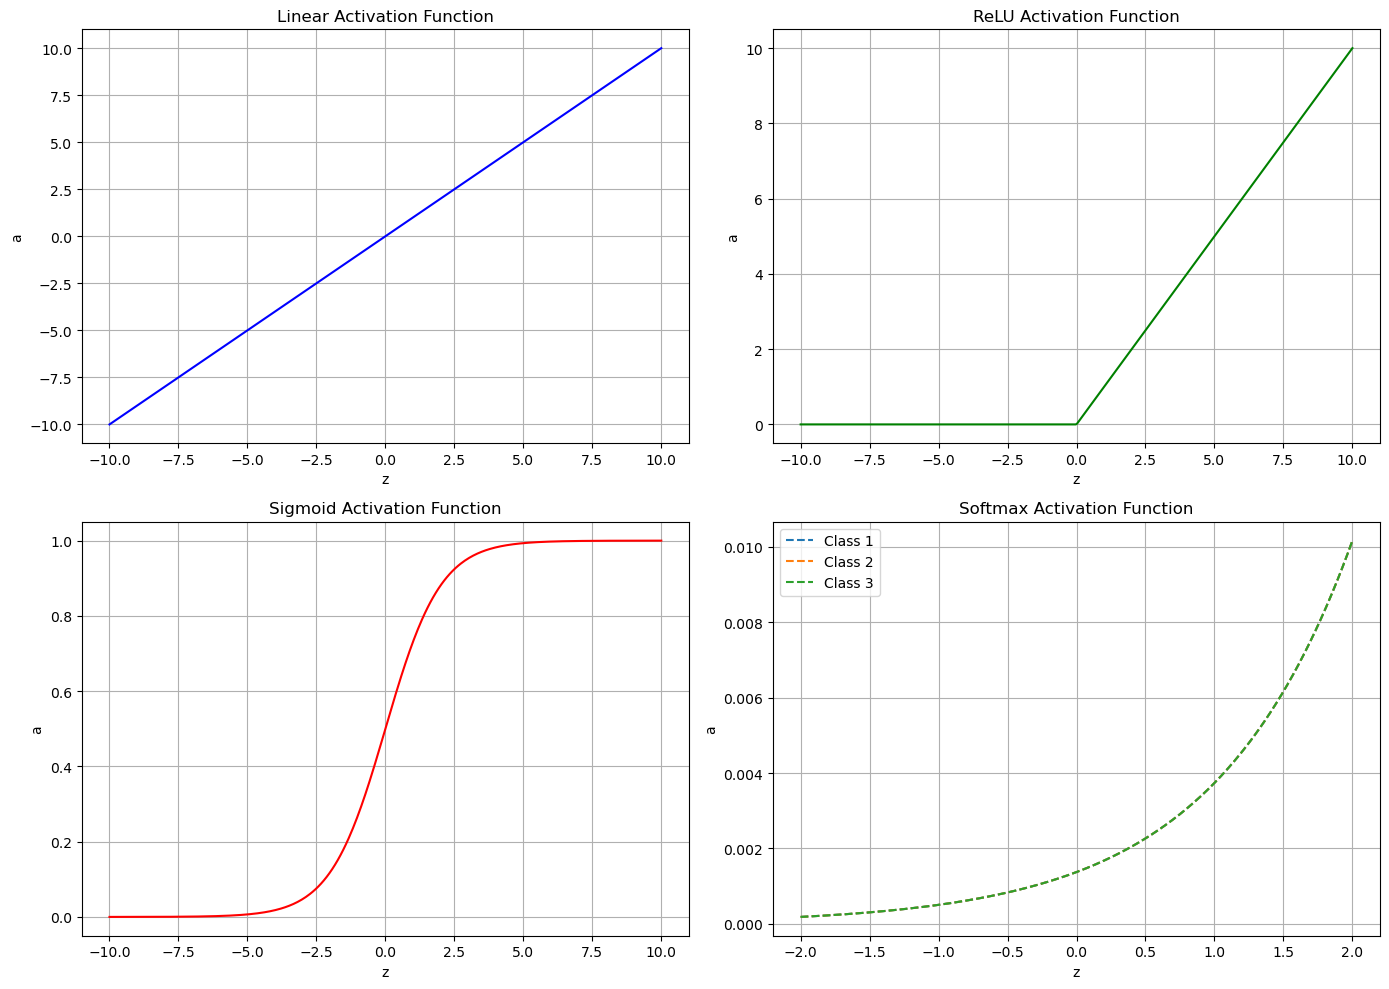

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of input values
z = np.linspace(-10, 10, 400)

# Activation functions
def linear(z):
    return z

def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    e_z = np.exp(z - np.max(z))  # Stability improvement
    return e_z / e_z.sum(axis=0)

# Define multiple values for softmax to visualize it
z_softmax = np.linspace(-2, 2, 400)
softmax_values = np.array([softmax(z_softmax + i) for i in range(3)]).T

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Linear activation function
axes[0, 0].plot(z, linear(z), color='blue')
axes[0, 0].set_title('Linear Activation Function')
axes[0, 0].set_xlabel('z')
axes[0, 0].set_ylabel('a')
axes[0, 0].grid(True)

# Plot ReLU activation function
axes[0, 1].plot(z, relu(z), color='green')
axes[0, 1].set_title('ReLU Activation Function')
axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('a')
axes[0, 1].grid(True)

# Plot Sigmoid activation function
axes[1, 0].plot(z, sigmoid(z), color='red')
axes[1, 0].set_title('Sigmoid Activation Function')
axes[1, 0].set_xlabel('z')
axes[1, 0].set_ylabel('a')
axes[1, 0].grid(True)

# Plot Softmax activation function (one for each class)
for i in range(softmax_values.shape[1]):
    axes[1, 1].plot(z_softmax, softmax_values[:, i], label=f'Class {i+1}', linestyle='--')
axes[1, 1].set_title('Softmax Activation Function')
axes[1, 1].set_xlabel('z')
axes[1, 1].set_ylabel('a')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In the context of neural networks, non-linearity is a fundamental aspect that enables the model to capture complex patterns and relationships in the data. Without non-linearity, transformations in the network would merely be linear combinations of the input, which means that multiple rotations or transformations in the input space could be represented by a single linear transformation matrix. This inherent limitation would restrict the network's capacity to model intricate, non-linear phenomena. The introduction of non-linear activation functions, such as ReLU, Sigmoid, or Softmax, allows neural networks to overcome this limitation. By applying non-linear functions to the outputs of neurons, neural networks gain the ability to learn and represent a broader range of transformations, thereby significantly enhancing their expressive power. This capability to represent and learn complex, non-linear mappings is what fundamentally distinguishes neural networks from linear models and contributes to their effectiveness in handling diverse and intricate tasks.

## Transformations in Neural Networks

- Neural layers perform transformations on data to represent it in various forms.
- These transformations are executed through the application of weights and biases.
- The weights and biases are learned from data during the training process.
- The representations learned through this process facilitate the performance of downstream tasks.
- Before the advent of deep neural networks, data representations were manually engineered through a process known as feature engineering, which relied on domain-specific knowledge.
- In a neural network, the layers systematically transform complex, high-dimensional data (analogous to data on a crumpled paper ball) into simpler, more interpretable representations (analogous to data on an unfolded sheet of paper).
- Each training iteration defines a better boundary on the training data. However, if the boundary is made perfect from excessive training then the performance drops on the test set. Hence, the optimal training time can be selected when training and testing errors, both are minimised.

## MNIST Handwritten Digit Recognition

The MNIST dataset is a well-known benchmark in the field of machine learning and computer vision. It consists of 28x28 pixel grayscale images of handwritten digits (0-9), with a total of 10 classes. The task is to build a neural network that can classify these images into the correct digit class.

- Flattening the 2D Image to a Vector
   - Input: Each image in the MNIST dataset is a 28x28 pixel grid.
   - Flattening Process: To feed this image into a neural network, it must first be flattened into a 1D vector. 
     - A 28x28 image has 784 pixels.
     - Each pixel value (ranging from 0 to 255) is treated as an input feature.
     - After flattening, the image is represented as a 784-dimensional vector.
     - Example: A 28x28 image `[ [pixel1, pixel2, ...], [pixel29, pixel30, ...], ...]` is flattened to `[pixel1, pixel2, pixel3, ..., pixel784]`.

- 2. Passing the Vector Through Layers
   - Input Layer: The flattened 784-dimensional vector is the input to the neural network.
   - Hidden Layers:
     - The network consists of one or more hidden layers, each made up of neurons.
     - Each neuron in a hidden layer performs a weighted sum of its inputs, applies an activation function (e.g., ReLU, Sigmoid), and passes the result to the next layer.
     - Example:
       - If the first hidden layer has 128 neurons, then the output of this layer will be a 128-dimensional vector.
       - The process continues through additional hidden layers.

- 3. Final Output Layer
   - Output Layer: The final layer is designed to output a vector of length 10, corresponding to the 10 digit classes (0-9).
   - Neurons: Each of the 10 neurons in this layer corresponds to one of the digit classes.
     - The neuron with the highest value in this layer represents the predicted digit class.
   - Softmax Activation:
     - To convert the raw output values into probabilities, a Softmax function is typically applied which ensures that the output values sum to 1, representing the probability distribution across the 10 classes.

- 4. Prediction
   - Class Prediction: The class with the highest probability in the output vector is chosen as the network’s prediction.
   - Example: If the output vector is `[0.01, 0.02, 0.03, ..., 0.90, 0.02]`, the predicted class is 7 (as the probability for the 7th class is the highest).

- 5. Training the Network
   - Loss Function: The network is trained using a loss function such as Cross-Entropy Loss, which measures the difference between the predicted probabilities and the actual class labels.
   - Backpropagation: The gradients of the loss with respect to each weight in the network are calculated and used to update the weights to minimize the loss.
   - Optimization: An optimizer like Stochastic Gradient Descent (SGD) or Adam is used to perform the weight updates during training.

- 6. Evaluation
   - Accuracy: After training, the network's performance is evaluated on a test set by measuring its accuracy, i.e., the percentage of correctly classified digits.


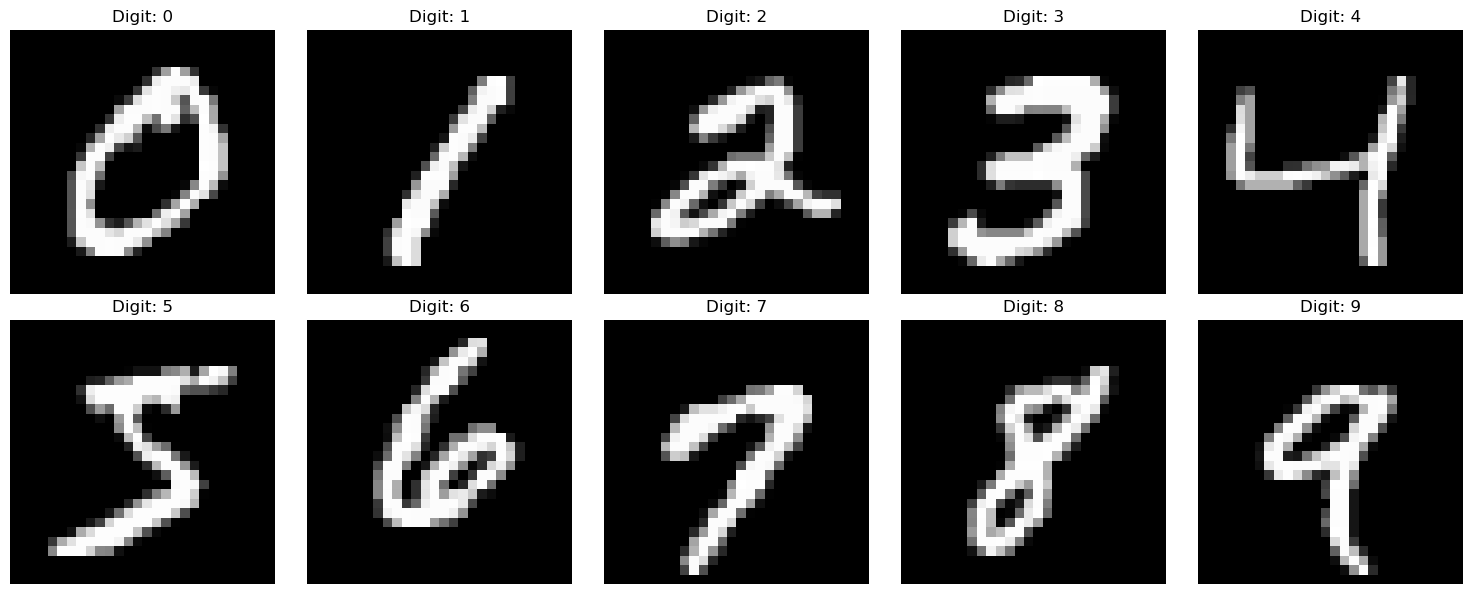

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define a transformation to convert images to tensors
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])

# Load the MNIST dataset
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Function to display a grid of images
def display_images(images, labels):
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    axs = axs.flatten()
    
    for ax, img, label in zip(axs, images, labels):
        img = img.squeeze()  # Remove single-dimensional entries
        np_img = img.numpy()  # Convert to NumPy array
        ax.imshow(np_img, cmap='gray')  # Display the image
        ax.set_title(f'Digit: {label}')
        ax.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()

# Get the first 10 unique digits
unique_digits = {}
for i in range(len(mnist_train)):
    image, label = mnist_train[i]
    if label not in unique_digits:
        unique_digits[label] = image
        if len(unique_digits) == 10:
            break

# Prepare images and labels for plotting
images = [unique_digits[digit] for digit in range(10)]
labels = list(range(10))

# Display the images in a 2x5 grid
display_images(images, labels)

### Dense Neural Network Overview

- **Input Layer**: Functions as a passthrough layer, receiving and passing data to the subsequent layers.
- **Hidden Layers**: Composed of neurons that process and transform the input data. Each hidden layer performs a series of computations to capture complex patterns.
- **Output Layer**:
  - For **regression tasks**: Outputs a single value or multiple values, corresponding to the quantities of interest.
  - For **classification tasks**: Outputs probabilities for each class, with the number of neurons equal to the number of classes.

- **Layer Terminology**:
  - **Lower Layers**: Layers closer to the input layer.
  - **Upper Layers**: Layers closer to the output layer.

- **Architecture**: The network is a **feedforward neural network (FNN)**, where signals flow in one direction only, from the input layer through the hidden layers to the output layer.

### Calculating the Size of a Dense Neural Network

In a dense neural network, the size of each layer and the number of parameters can be calculated using the following formulas. Here’s a step-by-step explanation for each layer using the formula:

$$\text{Number of Parameters} = (\text{Number of Input Neurons}) \times (\text{Number of Output Neurons}) + \text{(Number of Output Neurons)}$$

Each neuron in the input layer is connected to each neuron in the output layer. This forms the weights matrix, which has dimensions equal to the product of the number of input and output neurons.
Additionally, each neuron in the output layer has a bias term, contributing an extra parameter for each output neuron.

### Loss Functions

**1. Regression: Mean Square Error (MSE)**

The Mean Square Error (MSE) is used to measure the average squared difference between predicted and actual values in regression tasks.

- **Formula:**
  $$
  \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
  $$
  where:
  - $ m $ = Number of data points
  - $ y_i $ = Actual value for the \( i \)-th data point
  - $ \hat{y}_i $ = Predicted value for the \( i \)-th data point

**2. Classification: Cross Entropy (CE)**

The Cross Entropy loss function is used to measure the performance of a classification model by quantifying the difference between the actual class labels and the predicted probabilities.

- **Formula:**
  $$
  \text{CE} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{i,k} \log(p_{i,k})
  $$
  where:
  - $ m $ = Number of data points
  - $ K $ = Number of classes
  - $ y_{i,k} $ = Indicator (0 or 1) if class label \( k \) is the correct classification for the \( i \)-th data point
  - $ p_{i,k} $ = Predicted probability that the \( i \)-th data point belongs to class \( k \)

### Training the Neural Network

**1. Role of the Optimizer**

- **Function:** An optimizer adjusts the weights and biases in a neural network to minimize the loss function. 
- **Objective:** The goal is to find the optimal weights and biases that result in the lowest possible value for the loss function, improving the model's performance.

**2. Training Process**

- **Definition:** The process of adjusting the weights and biases to minimize the loss function is called training.
- **Method:** Training involves iteratively updating the weights and biases based on the optimizer's algorithms to reduce the loss function value.

**3. Stochastic Gradient Descent (SGD)**

- **Overview:** Stochastic Gradient Descent is a commonly used training algorithm that updates the weights and biases using a subset of the training data (mini-batch) rather than the entire dataset.
- **Variant - ADAM:** A variant of SGD, called ADAM (Adaptive Moment Estimation), combines the advantages of two other extensions of SGD: AdaGrad and RMSProp. ADAM adapts the learning rates of each parameter by considering both the first-order momentum and the second-order gradient.

Training a neural network involves selecting an optimizer to efficiently adjust the weights and biases, with SGD and its variants like ADAM being popular choices for this purpose.

### Stochastic Gradient Descent (SGD) Algorithm

Stochastic Gradient Descent (SGD) is an optimization technique used in unconstrained settings to minimize the loss function of a neural network. Unlike traditional gradient descent, which uses the entire dataset to compute gradients, SGD updates weights using a single data point or a mini-batch of data points at each iteration. This can lead to faster convergence and better performance for large datasets.

Here’s an intuitive explanation of how SGD works, along with the equations involved:

#### 1. **Concept of Gradient Descent**

Gradient Descent is an optimization algorithm used to find the minimum of a function. In the context of neural networks, it minimizes the loss function $ L(\theta) $, where $\theta$ represents the parameters (weights and biases) of the network.

The basic idea is to update the parameters in the direction that reduces the loss function. This direction is given by the negative gradient of the loss function with respect to the parameters:

$$
\theta \leftarrow \theta - \eta \nabla L(\theta)
$$

- $ \theta $ = Parameters (weights and biases)
- $ \eta $ = Learning rate (step size)
- $ \nabla L(\theta) $ = Gradient of the loss function with respect to parameters

#### 2. **Stochastic Gradient Descent**

In Stochastic Gradient Descent, the parameters are updated based on a single data point or a small mini-batch, rather than the entire dataset. This approach can lead to more frequent updates and faster convergence. The update rule for SGD with a single data point $(x_i, y_i)$ is:

$$
\theta \leftarrow \theta - \eta \nabla L(\theta; x_i, y_i)
$$

Where $ \nabla L(\theta; x_i, y_i) $ is the gradient of the loss function with respect to the parameters, calculated using the single data point $(x_i, y_i)$.

#### 3. **Mini-Batch Gradient Descent**

To balance the efficiency of SGD and the stability of batch gradient descent, mini-batch gradient descent is often used. Here, the update is performed using a small random subset of the data (mini-batch) rather than a single data point:

$$
\theta \leftarrow \theta - \eta \nabla L(\theta; \text{mini-batch})
$$

Where the gradient $ \nabla L(\theta; \text{mini-batch})$ is computed as the average of the gradients for each data point in the mini-batch.

#### 4. **Learning Rate**

The learning rate $ \eta $ controls how large the steps are during parameter updates. A well-chosen learning rate can lead to faster convergence, while a poorly chosen rate can result in slow convergence or divergence. Learning rates can be constant or adjusted over time (learning rate schedules).

#### 5. **Advantages of SGD**

- **Faster Convergence:** By updating parameters more frequently, SGD can reach good solutions faster than batch gradient descent.
- **Better Generalization:** The noisy updates can help the model escape local minima and find better solutions.
- **Scalability:** Suitable for large datasets because it does not require processing the entire dataset at once.

#### **Example Calculation**

Consider a simple linear regression with loss function:

$$
L(\theta) = \frac{1}{2m} \sum_{i=1}^m (y_i - (\theta_0 + \theta_1 x_i))^2
$$

Where $m$ is the number of data points. For SGD, the gradient of $ L(\theta) $ with respect to $\theta_0 $ and $ \theta_1$ using a single data point $(x_i, y_i)$ is:

$$
\nabla L(\theta; x_i, y_i) = \left[ - (y_i - (\theta_0 + \theta_1 x_i)), - (y_i - (\theta_0 + \theta_1 x_i)) x_i \right]
$$

The parameter update step is:

$$
\theta_0 \leftarrow \theta_0 - \eta \left[ - (y_i - (\theta_0 + \theta_1 x_i)) \right]
$$
$$
\theta_1 \leftarrow \theta_1 - \eta \left[ - (y_i - (\theta_0 + \theta_1 x_i)) x_i \right]
$$

This is performed iteratively over data points or mini-batches until convergence is achieved.

By updating parameters based on gradients from single data points or mini-batches, SGD efficiently optimizes the neural network’s parameters and can handle large datasets effectively.

### Iteration, Batch, Epoch

These terms are fundamental in the context of training neural networks and machine learning models. Here’s a detailed explanation of each:

#### 1. **Iteration**

- **Definition:** An iteration refers to a single update of the model's parameters (weights and biases) based on a subset of the training data.
- **In Practice:** During each iteration, a batch of data is fed into the model, and the optimizer adjusts the parameters to minimize the loss function based on the gradients computed from that batch.

#### 2. **Batch**

- **Definition:** A batch is a subset of the training data used in a single iteration of model training. The size of the batch is called the batch size.
- **Batch Size:** Determines how many samples are processed before the model's parameters are updated. For example, if the batch size is 32, then 32 samples are used to compute the gradient and update the model parameters in one iteration.
- **Types of Gradient Descent:**
  - **Mini-Batch Gradient Descent:** Uses a batch size greater than 1 but less than the total number of training samples.
  - **Full-Batch Gradient Descent:** Uses the entire training dataset as a batch.
  - **Stochastic Gradient Descent (SGD):** Uses a batch size of 1, updating parameters based on a single training sample.

In practice, data points are not selected randomly (GPU registers). Earlier the size of a batch used to be of the form $2^n$ (GPU registers) but now it can be anything diue to CUDA kernels.

#### 3. **Epoch**

- **Definition:** An epoch refers to one complete pass through the entire training dataset.
- **Training Process:** During an epoch, every sample in the training dataset has been used once to update the model parameters. Multiple epochs are typically required to achieve good performance, as the model needs to see the data multiple times to learn effectively.
- **In Practice:** If the dataset has 1000 samples and the batch size is 100, then there are $ \frac{1000}{100} = 10 $ iterations per epoch. If training for 10 epochs, the model will perform a total of $10 \times 10 = 100 $ iterations.

In cases where a loss function \( L \) is not differentiable, subgradients are used as a generalization of gradients. Subgradients provide a way to characterize the slope of a function at points where the function may have kinks or discontinuities. For differentiable functions, gradients can be efficiently computed using **AutoDiff** (automatic differentiation), which automatically calculates derivatives by systematically applying the chain rule. AutoDiff is particularly useful in machine learning and optimization for training models by providing precise gradient information with minimal manual effort. In summary, while subgradients handle non-differentiable scenarios, AutoDiff simplifies gradient computation for smooth functions.

### K-Fold Cross Validation

**K-Fold Cross Validation** is a technique used to evaluate the performance of a machine learning model and ensure that it generalizes well to unseen data. It is used to mitigate issues such as overfitting and to provide a more reliable estimate of a model's performance.

#### How It Works

1. **Partitioning the Data:**
   - The dataset is divided into **K equally sized folds** or subsets. Common values for K are 5 or 10.
   - For instance, if $K = 5$, the dataset is split into 5 folds.

2. **Training and Validation:**
   - The model is trained **K times**, each time using $K-1$ folds for training and the remaining fold for validation.
   - This means that in each iteration, one of the folds is held out as the validation set, while the remaining $K-1$ folds are used to train the model.

3. **Performance Evaluation:**
   - After training and validating the model $K$ times, you end up with K performance metrics (e.g., accuracy, F1-score) from each fold.
   - The final performance estimate is obtained by averaging these $K$ metrics, providing a more robust evaluation of the model's performance.

#### Advantages

- **Reduces Overfitting:** By validating on multiple subsets of the data.
- **More Reliable Estimate:** Uses all data for both training and validation.
- **Efficient Use of Data:** Especially useful with limited data.

### Hyper-parameter Tuning

**Hyper-parameter Tuning** involves optimizing the hyper-parameters of a machine learning model to achieve the best performance. Hyper-parameters are parameters that are not learned from the training data but are set before the training process begins.

#### Types of Hyper-parameters

- **Model Hyper-parameters:** Such as the number of layers in a neural network or the number of trees in a random forest.
- **Training Hyper-parameters:** Such as learning rate, batch size, and number of epochs.

#### Methods of Hyper-parameter Tuning

1. **Grid Search:**
   - **Definition:** An exhaustive search method that evaluates the model performance for every combination of hyper-parameter values in a predefined grid.
   - **Procedure:**
     - Define a grid of hyper-parameter values.
     - Train and evaluate the model for each combination using cross-validation.
     - Select the combination with the best performance.
   - **Example:** Testing different values of learning rates and number of hidden layers.

2. **Random Search:**
   - **Definition:** A method where random combinations of hyper-parameters are tested instead of every possible combination.
   - **Procedure:**
     - Randomly sample hyper-parameter values from predefined distributions.
     - Train and evaluate the model for each sampled combination using cross-validation.
     - Choose the best-performing set of hyper-parameters.
   - **Advantage:** Often finds good hyper-parameters faster than grid search.

3. **Bayesian Optimization:**
   - **Definition:** A probabilistic model-based optimization technique that builds a model of the objective function and uses it to choose the most promising hyper-parameters to evaluate.
   - **Procedure:**
     - Define a probabilistic model of the function that maps hyper-parameters to performance.
     - Use this model to guide the search for the best hyper-parameters.
     - Update the model as new hyper-parameters are evaluated.
   - **Advantage:** More efficient than grid and random search, especially for expensive-to-evaluate functions.

4. **Automated Machine Learning (AutoML):**
   - **Definition:** Tools and techniques that automate the process of hyper-parameter tuning and model selection.
   - **Example:** Tools like Google AutoML and H2O.ai.

### Parameters and Hyperparameters

| Aspect       | Parameters                                      | Hyperparameters                                       |
|--------------|-------------------------------------------------|-------------------------------------------------------|
| **Definition** | Variables learned from training data            | Configurations set before training                    |
| **Examples**   | Weights in neural networks, coefficients in linear regression | Learning rate, number of trees in a random forest, batch size in neural networks |
| **Computed by** | Learning algorithm (SGD, or Tree growth)       | Set manually or through (brute force or optimized) search techniques (Cross validation, Grid search) |
| **Influence**   | Directly affect model predictions              | Affect the training process and model performance      |

### Training and Validation Error: When to Stop?

- **Underfitting** occurs when the model has high training and validation errors. This suggests that the model is too simple and cannot capture the underlying patterns of the data. Both curves are high, indicating that the model hasn't learned sufficiently.
  
- **Overfitting** happens when the training error is low, but the validation error increases. This indicates that the model is too complex and is capturing noise rather than generalizing well to unseen data.

- The ideal scenario is a **Robust fit**, where both the training and validation errors are low. This represents the best balance between model complexity and generalization.

#### Key Terms:
- **Training curve**: Measures the error on the training data.
- **Validation curve**: Measures the error on unseen validation data.

<br><br>
<center>
<img src="https://www.researchgate.net/profile/Randa-Natras/publication/362242434/figure/fig4/AS:1182839072653332@1659022219870/Training-and-validation-test-errors-as-a-function-of-model-complexity-Optimal-model.ppm" width=800px/>
</center>
<br><br>

### Regularization to Avoid Overfitting

- **Capacity** of a neural network refers to its tendency to overfit.
- More parameters in a model increase its **capacity** (degrees of freedom).
- **Regularization** reduces a network's capacity to overfit by adding a penalty to the model.
  - Norm-based regularization: Adds a penalty term (involving the model's parameters) to the loss function.
  - **Drop-out** regularization: Randomly drops units during training to prevent co-adaptation.
- **Batch normalization**, **layer normalization**, and **early stopping** also serve as regularization techniques.

An example is the modified loss function $$L(w_1, \ldots, w_n) + \lambda\left(\sum_{i = 1}^{n} \mid w_i \mid\right)$$

### Transfer Learning

**Transfer learning** is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second, related task. Instead of training a model from scratch, which requires a large dataset and significant computational resources, transfer learning leverages a pre-trained model. This method is particularly useful when you have limited data for the new task.

#### Key Concepts:
- **Pre-trained Model**: A model trained on a large dataset (e.g., ImageNet for image classification) that can be reused.
- **Fine-tuning**: Adjusting the pre-trained model by continuing the training process on a new dataset. Only certain layers are updated, depending on how different the new task is.
- **Feature Extraction**: Using the pre-trained model to extract useful features from the new dataset, without modifying the original model weights.

#### Advantages:
- Reduces training time.
- Requires less data for the new task.
- Improves performance, especially when the new dataset is small.

Transfer learning is commonly used in domains such as image recognition, natural language processing, and speech recognition.

#### Frozen Layers in Transfer Learning

In transfer learning, **frozen layers** refer to the layers of a pre-trained model that are kept unchanged (i.e., their weights are not updated) while adapting the model for a new task.

##### Two Approaches:
1. **Classifier Added on Top (Frozen Model)**:
   - In this approach, a **pre-trained model** is used as a **feature extractor**. 
   - A new classifier (e.g., a fully connected layer) is added on top of the model to perform the new task (such as image classification).
   - All layers of the pre-trained model are **frozen**, meaning their weights are not modified during training on the new task.
   - Only the new classifier is trained, making this approach computationally efficient and ideal when the new dataset is small.

2. **Fine-Tuning Some Layers**:
   - In this approach, certain layers (typically the last few layers) of the pre-trained model are **unfrozen**.
   - These unfrozen layers are **trained further** (fine-tuned) to adapt to the new task.
   - The earlier layers remain frozen as they contain general features (like edges or textures in images) that are useful for a wide range of tasks.
   - The newly added classifier and the unfrozen layers are trained together, allowing the model to adjust to the new task while retaining the knowledge learned from the original dataset.